# Chapter05 데이터 시각화
데이터 과학을 위한 파이썬 머신러닝

- <a href="#05.1맷플롯립">05.1 맷플롯립</a>
- <a href="#05.2시본">05.2 시본</a>
- <a href="#05.3플롯리">05.3 플롯리</a>
- <a href="#예제:전세계행복지수">예제: 전세계행복지수 분석</a>

---------------

### 라이브러리 설치

In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
!pip install plotly

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
print(f'matplotlib version : {matplotlib.__version__}')
print(f'seaborn version    : {sns.__version__}')
print(f'plotly version     : {plotly.__version__}')

matplotlib version : 3.6.3
seaborn version    : 0.12.2
plotly version     : 5.13.0


#### 한글 폰트 사용

In [2]:
# 한글 폰트 사용
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

# plt.rc('font', family='AppleGothic')            # for Mac
plt.rc("font", family = "Malgun Gothic")        # for Win
plt.rcParams['font.family'] = 'Malgun Gothic'   # for Win
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # 그래프 축에서 마이너스 표시

------------------------------

## <a name="05.1맷플롯립">05.1 맷플롯립</a>

### 1. 맷플롯립의 구조
- 맷플롯립(matplotlib) : 매트랩(matlab) 기능을 파이썬에서 그대로 사용하도록 하는 시각화 모듈
- MATLAB: 매스웍스에서 개발한 수치 해석 및 프로그래밍 환경을 제공하는 공학용 소프트웨어. 행렬을 기반으로 한 계산 기능을 지원하며 함수나 데이터를 그림으로 그리는 기능 및 프로그래밍을 통한 알고리즘 구현 등을 제공함
- 매트랩을 포장(wrapping)해서 맷플롯립을 지원
 - - import matplotlib.pyplot as plt 
<br><br>
- https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png
- https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

#### 1.1 pyplot
- 맷플롯립을 이용할 때 가장 기본이 되는 객체
- 파이플롯(pyplot) 위에 그림(figure) 객체를 올리고 그 위에 그래프에 해당하는 축(axes)을 올림
- 그림 위에 축을 여러 장 올리면 여러 개의 그래프 작성

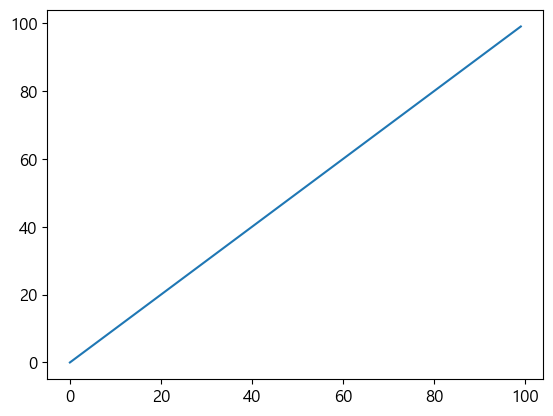

In [3]:
import matplotlib.pyplot as plt # matplotlib 모듈 호출

X = range(100)
Y = range(100)
plt.plot(X, Y)
plt.show()

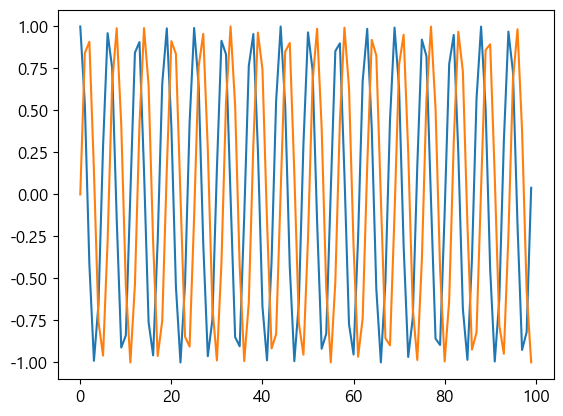

In [4]:
import numpy as np # numpy 모듈 호출

X_1 = range(100)
Y_1 = [np.cos(value) for value in X]

X_2 = range(100)
Y_2 = [np.sin(value) for value in X]

plt.plot(X_1, Y_1)
plt.plot(X_2, Y_2)
plt.show()

#### 1.2 그림과 축
- fig : 그림은 그래프를 작성하는 밑바탕이 됨
- ax  : 축은 실제로 그래프를 작성하는 공간

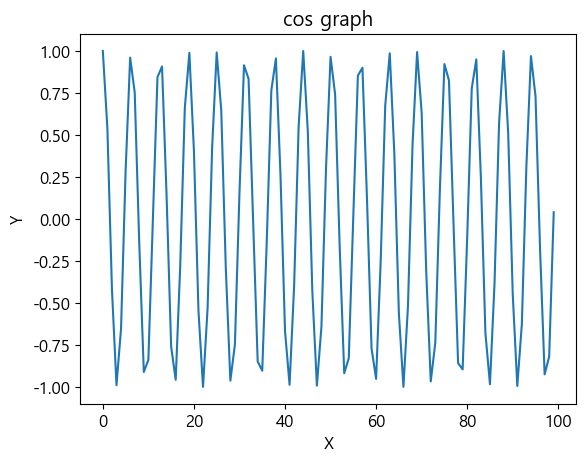

In [5]:
fig, ax = plt.subplots()   # (1) figure와 axes 객체 할당

X_1 = range(100)
Y_1 = [np.cos(value) for value in X]

ax.plot(X_1, Y_1)         # (2) plot 함수를 사용하여 그래프 생성
ax.set(title='cos graph', # (3)그래프 제목,X축 라벨,Y축 라벨 설정
       xlabel='X', 
       ylabel='Y');

plt.show()                # (4) 그래프 출력

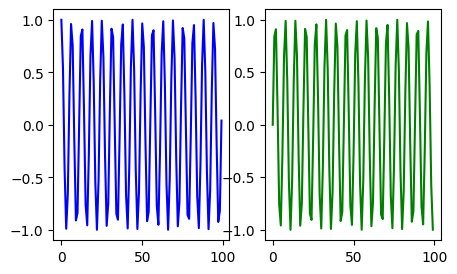

In [14]:
fig = plt.figure()            # (1) figure 반환
fig.set_size_inches(5,3)      # (2) figure의 크기 지정

ax_1 = fig.add_subplot(1,2,1) # (3) 첫 번째 그래프 생성
ax_2 = fig.add_subplot(1,2,2) # (4) 두 번째 그래프 생성

ax_1.plot(X_1, Y_1, c="b") # (5) 첫 번째 그래프 설정
ax_2.plot(X_2, Y_2, c="g") # (6) 두 번째 그래프 설정
plt.show()                 

#### 1.3 서브플롯 행렬
- 축을 여러 개 만들 때 서브플롯으로 축 객체 공간 확보
- 그림 객체에서 add_subplot 함수 사용 ,또는 plot 객체에서 subplots 함수 사용

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,3)
print(ax)
print(type(ax))

[<AxesSubplot: > <AxesSubplot: >]
<class 'numpy.ndarray'>


In [16]:
x = np.linspace(-1,1,100)    # (1) x 값과 y_n 값 생성
y_1 = np.sin(x)
y_2 = np.cos(x)
y_3 = np.tan(x)
y_4 = np.exp(x)

fig, ax = plt.subplots(2, 2) # (2) 2×2 figure 객체를 생성

ax[0, 0].plot(x, y_1)        # (3) 첫 번째 그래프 생성
ax[0, 1].plot(x, y_2)        # (4) 두 번째 그래프 생성
ax[1, 0].plot(x, y_3)        # (5) 세 번째 그래프 생성
ax[1, 1].plot(x, y_4)        # (6) 네 번째 그래프 생성

plt.show()

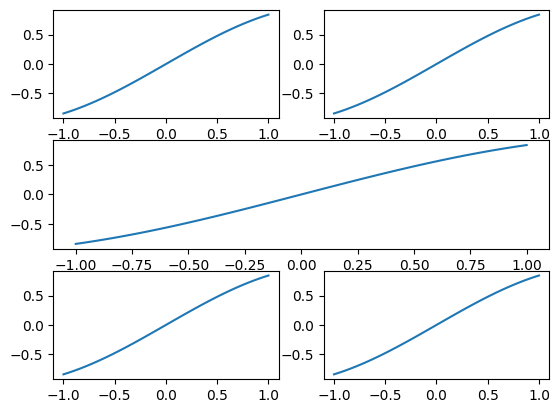

In [18]:
ax1 = plt.subplot(321) # (1) 첫 번째 공간에 axes 생성
plt.plot(x, y_1)
ax2 = plt.subplot(322) # (2) 두 번째 공간에 axes 생성
plt.plot(x, y_1)
ax3 = plt.subplot(312) # (3) 두 번째 공간에 axes 생성
plt.plot(x, y_1)
ax4 = plt.subplot(325) # (4) 다섯 번째 공간에 axes 생성
plt.plot(x, y_1)
ax5 = plt.subplot(326) # (5) 여섯 번째 공간에 axes 생성
plt.plot(x, y_1)

plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 크기 설정
# plt.rcParams['figure.figsize'] = (10, 6)  # (가로,세로) 인치 단위
plt.figure(figsize=(10, 6))     # (10,6) 인치 그래프

# 그래프 공간 설정
fig, ax = plt.subplots(2,2)      # 2행 2열 그래프 공간
print(fig, ax)

plt.style.use('default') 

# 선 그래프
X = np.linspace(0, 10, 100)      # 0~10사이의 선형 분포 100개 
Y = np.cos(X)                    # X의 코사인 값
ax[0,0].plot(X, Y)               # 선 그래프

# 막대 그래프
X = np.arange(10)                # 0~9사이의 연속값
Y = np.random.uniform(1,10,10)   # 균일분포값 생성
ax[0,1].bar(X, Y)                # 막대 그래프

# 점 그래프
X = np.random.randn(100)         # 정규 분포를 가지는 데이터
Y = np.random.randn(100)         # 정규 분포를 가지는 데이터
ax[1,0].scatter(X, Y)

# 분포를 2D 이미지 그림으로
Z = np.random.uniform(0,1,(5,5)) # 0~1사이의 균일분포값을 5행x5열
ax[1,1].imshow(Z)                # 2D 이미지 그림으로 표현

plt.show()

Figure(640x480) [[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]


<Figure size 1000x600 with 0 Axes>

C:\python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


--------------------

### 2. 맷플롯립으로 그래프 꾸미기

#### 2.1 색상
- color 또는 c 매개변수로 색상 변경
- RGB 값을 사용해서 #을 붙여 16진법으로 색상 표현
- b, g, r, c, m, y, k, w 등 약어 입력
- https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

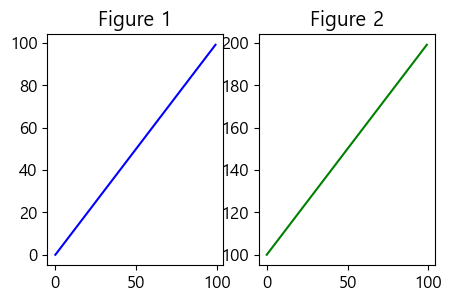

In [45]:
fig = plt.figure() 
fig.set_size_inches(5,3) 

ax_1 = fig.add_subplot(1,2,1) 
ax_2 = fig.add_subplot(1,2,2) 

ax_1.plot(X_1, Y_1, c="b") 
ax_1.set_title("Figure 1")
ax_2.plot(X_2, Y_2, c="g") 
ax_2.set_title("Figure 2")

plt.show()

In [46]:
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (5, 3)  # (가로,세로) 인치 단위

X_1 = range(100)
Y_1 = [value for value in X_1]

X_2 = range(100)
Y_2 = [value + 100 for value in X_2]

plt.plot(X_1, Y_1, color="#000000") 
plt.plot(X_2, Y_2, c="c")

plt.show()

#### 2.2 선의 형태
- linestyle 또는 ls로 선의 형태를 정의
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html?highlight=linestyle 

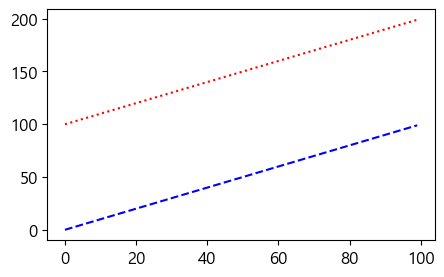

In [47]:
plt.plot(X_1, Y_1, c="b", linestyle="dashed")
plt.plot(X_2, Y_2, c="r", ls="dotted")

plt.show()

#### 2.3 제목

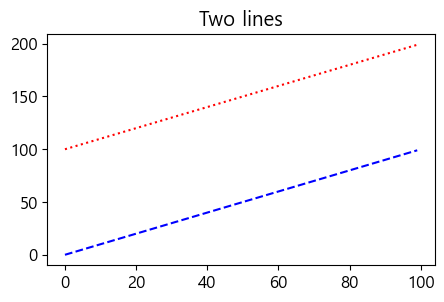

In [48]:
plt.plot(X_1, Y_1, c="b", linestyle="dashed")
plt.plot(X_2, Y_2, c="r",ls="dotted")

plt.title("Two lines")
plt.show()

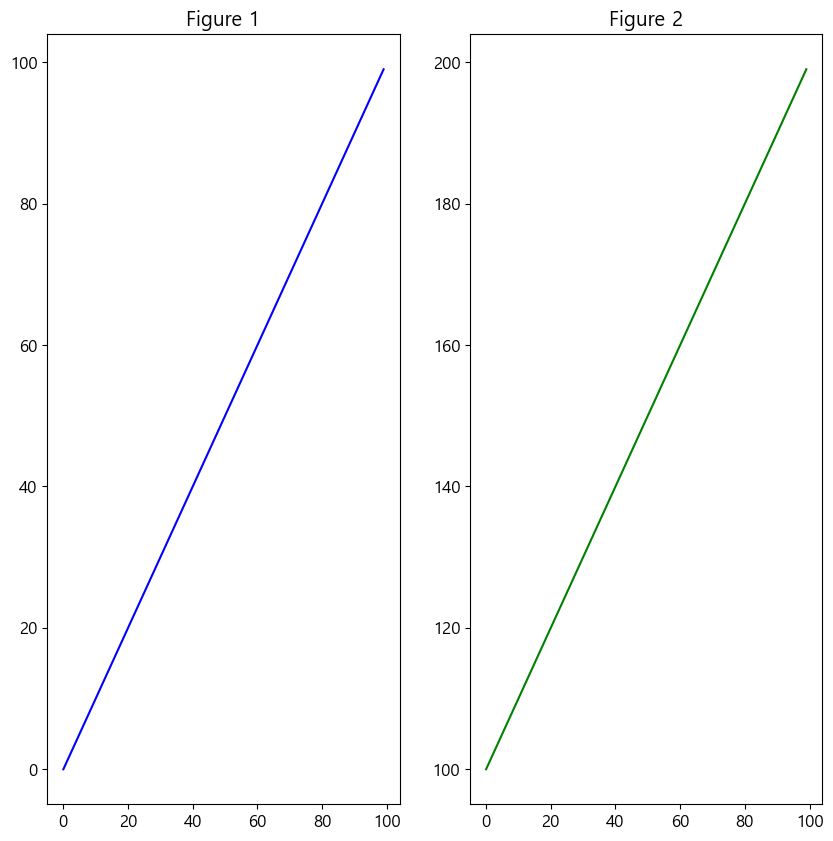

In [49]:
fig = plt.figure() 
fig.set_size_inches(10,10) 

ax_1 = fig.add_subplot(1,2,1) 
ax_2 = fig.add_subplot(1,2,2) 

ax_1.plot(X_1, Y_1, c="b") 
ax_1.set_title("Figure 1")
ax_2.plot(X_2, Y_2, c="g") 
ax_2.set_title("Figure 2")

plt.show()

#### 2.4 범례
- legend 함수 사용하여 생성 
- loc 매개변수로 범례의 위치 지정, 값은 center, upper right 등 총 11가지
- best라고 지정하면 적절한 위치에 범례가 놓임 

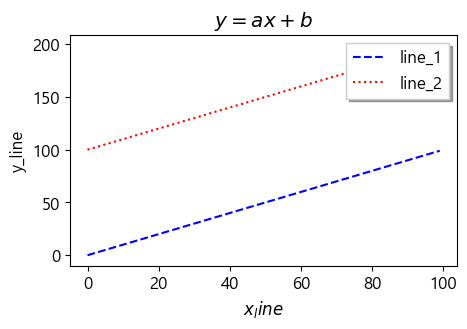

In [52]:
plt.plot(X_1, Y_1, 
         color="b", 
         linestyle="dashed", 
         label='line_1')
plt.plot(X_2, Y_2, 
         color="r", 
         linestyle="dotted", 
         label='line_2')
plt.legend(shadow=True, fancybox=False, loc="upper right")

plt.title('$y = ax+b$')
plt.xlabel('$x_line$')
plt.ylabel('y_line')
plt.show()

------------------

### 3. 맷플롯립에서 사용하는 그래프
- 데이터 테이블 전체를 지칭하는 객체
- 넘파이 배열의 특성을 그대로 가짐
- 인덱싱 : 열과 행 각각 사용하여 하나의 데이터에 접근

### 3.1 산점도(scatter)
- 매개변수 c는 포인트 색상을 지정
- marker는 포인트 모양을 지정
- size는 포인트 크기를 지정
- alpha는 포인트 불투명도를 지정

In [53]:
data_1 = np.random.rand(512, 2)
data_2 = np.random.rand(512, 2)

plt.scatter(data_1[:,0], data_1[:,1], 
            c="b", marker="x")
plt.scatter(data_2[:,0], data_2[:,1], 
            c="r", marker="o")

plt.show()

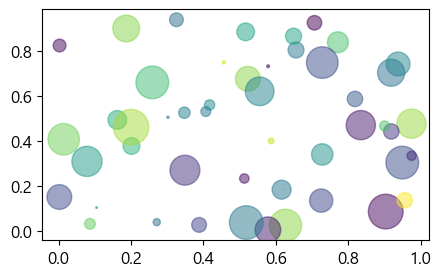

In [54]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

plt.scatter(x, y, 
            s=area, c=colors, alpha=0.5)
plt.show()

### 3.2 막대그래프(bar)
- 데이터의 개수나 크기를 비교

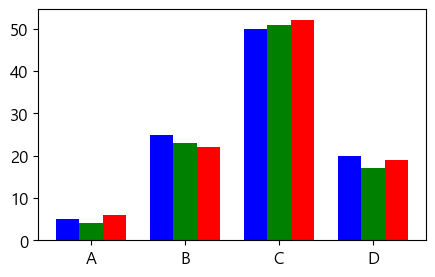

In [55]:
# (1) 데이터 생성
data = [[5., 25., 50., 20.],
        [4., 23., 51., 17],
        [6., 22., 52., 19]]

# (2) X 좌표 시작점
X = np.arange(0,8,2) 

# (3) 3개의 막대그래프 생성
plt.bar(X + 0.00, data[0], color = 'b', width = 0.50)
plt.bar(X + 0.50, data[1], color = 'g', width = 0.50)
plt.bar(X + 1.0, data[2], color = 'r', width = 0.50)

# (4) X축에 표시될 이름과 위치 설정
plt.xticks(X+0.50, ("A","B","C", "D"))

# (5) 막대그래프 출력
plt.show()

### 3.3 누적 막대그래프(stacked bar graph)
- 누적 막대그래프(stacked bar graph) : 데이터를 밑에서부터 쌓아올려 데이터를 표현

[0 1 2 3]


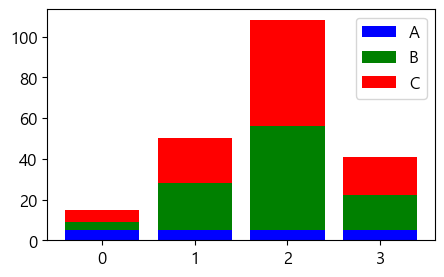

In [57]:
data = np.array([[5., 25., 50., 20.],
                 [4., 23., 51., 17],
                 [6., 22., 52., 19]])

color_list = ['b', 'g', 'r']
data_label = ["A","B","C"]
X = np.arange(data.shape[1])
print(X)

for i in range(3):
    plt.bar(X, data[i], 
            bottom = np.sum(data[:i], axis=0), 
            color = color_list[i], 
            label=data_label[i])

plt.legend()
plt.show()

### 3.3 히스토그램(histogram)
- 데이터의 분포를 표현

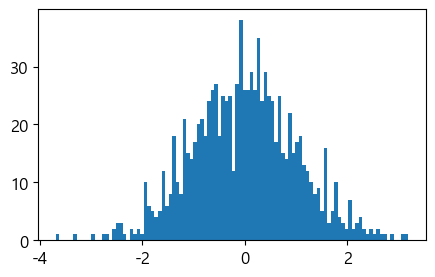

In [58]:
N = 1000
X = np.random.normal(size=N)

plt.hist(X,bins=100)
plt.show()

### 3.4 상자그림(boxplot)
- 상자그림(boxplot) : 사분위수를 시각화하여 데이터의 분포와 밀집 정도를 표현

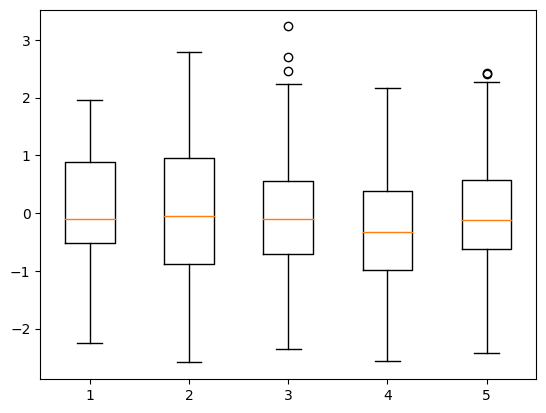

[[ 5.96051647e-01  1.38600010e-01  5.32919522e-01 -1.54054546e+00
   5.70681763e-01]
 [ 8.23364275e-01  2.79906100e+00  8.63336315e-02  3.33754962e-01
  -6.86029698e-01]
 [-3.77835142e-01  1.30230013e+00  7.04999034e-01  9.85022581e-01
  -6.22590160e-01]
 [-5.47959037e-01  9.94876620e-02 -1.24618392e-01 -1.40585162e+00
  -2.34529494e+00]
 [-9.99323396e-02 -2.85614195e-01 -4.25399851e-01 -7.89444996e-01
   1.34943883e+00]
 [-5.39843891e-01 -1.85870220e+00 -1.09612097e+00  7.55951122e-01
   1.68207611e+00]
 [ 1.31671531e+00 -1.06711383e+00  2.64791506e-01 -1.00685075e+00
  -6.46482683e-01]
 [-4.57498486e-01  1.32858188e+00  1.35084770e+00 -1.89699241e+00
   4.37896998e-01]
 [-3.25758539e-01  1.35246351e+00 -8.94511643e-01  7.80086105e-01
  -1.72500326e-01]
 [ 6.03984500e-01  1.08592564e+00  3.89104382e-01 -2.08318861e-01
  -2.55848961e-01]
 [-1.50785307e-02 -8.81759801e-01  6.25769841e-01 -6.38497658e-02
  -2.14265338e+00]
 [ 8.76464619e-01  1.01687624e+00 -7.53664510e-01 -5.47863407e-01

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(100,5)
plt.boxplot(data)
plt.show()

-----------------

## <a name="05.2시본">05.2 시본</a> 

### 1. 시본의 기본 (Seaborn)
- 시본(seaborn) : 맷플롯립을 바탕으로 다양한 함수 사용을 돕는 일종의 래퍼(wrapper) 모듈
- 맷플롯립과 동일한 결과물이 나오며, 작성 과정이 간단
- xticks 설정하지 않아도 각 축에 라벨 자동으로 생성
- 데이터프레임과 x, y에 해당하는 열 이름만 지정하면 됨
- sns.set_style("그래프 스타일") : darkgrid(default), whitegrid, dark, white, ticks
- sns.despine() : 축, 테두리 지정 : left, right, top, bottom # default

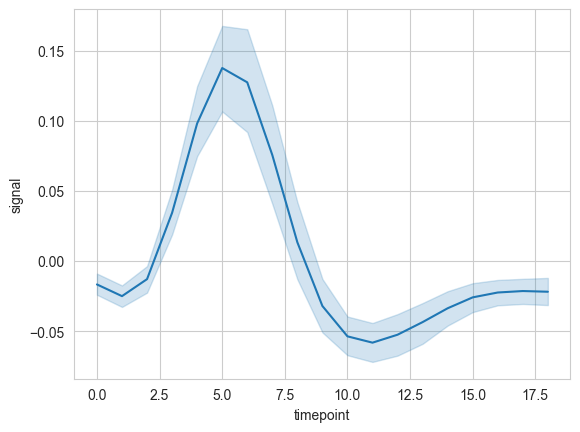

In [8]:
import numpy as np                    
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns                # (1)seaborn 모듈 호출

fmri = sns.load_dataset("fmri")       # (2) fmri 데이터셋 사용
sns.set_style("whitegrid")            # (3) 기본 스타일 적용
sns.lineplot(x="timepoint", y="signal", data=fmri) # (4) 선그래프 작성
plt.show()

In [66]:
sns.get_dataset_names()  # Seaborn 데이터셋 목록

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [67]:
fmri.sample(n=10, random_state=1)

subject  timepoint event    region    signal
806      s6         18   cue  parietal  0.019532
691      s5         15   cue   frontal -0.019507
148      s5          8  stim  parietal  0.006805
676     s13          0   cue  parietal -0.018394
156     s11          7  stim  parietal  0.254042
27       s1         17  stim  parietal -0.038021
200     s11          4  stim  parietal  0.087175
262      s3          0  stim  parietal -0.008576
94       s4         12  stim  parietal -0.090036
339      s4          5  stim   frontal  0.455575

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

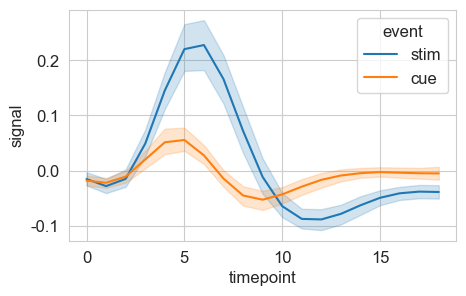

In [68]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

### 2. 시본에서 사용하는 그래프

### 2.1 회귀 그래프
- 회귀 그래프(regression plot) : 회귀식을 적용하여 선형회귀 추세선을 그래프에 함께 작성
- 선형회귀 추세선 : 데이터를 기반으로 데이터의 x값 대비 y값 변화를 예측하는 직선
- 함수 regplot 사용

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

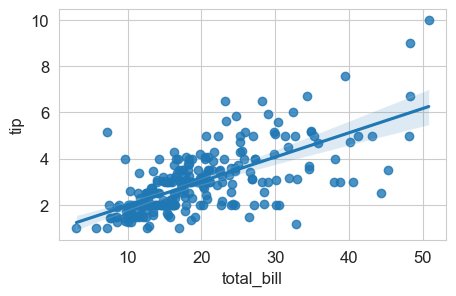

In [72]:
tips = sns.load_dataset("tips")
tips
sns.regplot(x="total_bill", y="tip", data=tips, x_ci=95)

### 2.2 산점도
- 산점도(scatter plot) : x, y를 기준으로 데이터의 분포 표현
- 함수 scatterplot 사용

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

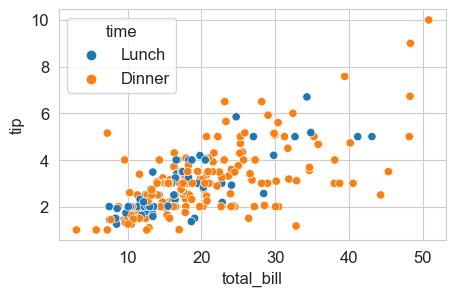

In [73]:
tips = sns.load_dataset("tips")
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

### 2.3 비교 그래프
- 비교 그래프(counter plot) : 범주형 데이터의 항목별 개수

<AxesSubplot: xlabel='smoker', ylabel='count'>

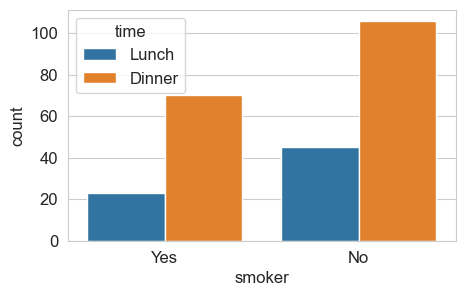

In [74]:
tips = sns.load_dataset("tips")
sns.countplot(x="smoker", hue="time", data=tips)

### 2.4 막대그래프
- y 값이 연속형 값일 경우 해당 값들의 평균을 나타냄
- 데이터의 신뢰구간을 검은색 막대로 표현
- 함수 barplot 사용

<AxesSubplot: xlabel='day', ylabel='total_bill'>

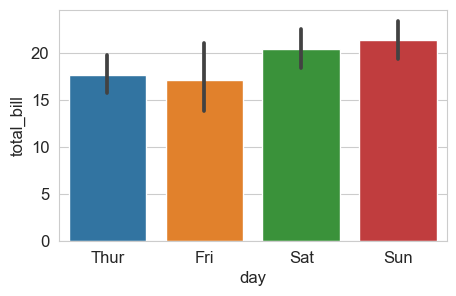

In [76]:
sns.barplot(x="day", y="total_bill", data=tips)

### 3. 3. 사전 정의된 그래프
- 맷플롯립 관점에서 여러 그래프들을 합쳐 정보를 추출
- 특히 범주형 데이터에 유용

#### 3.1 분포를 나타내는 그래프 : 바이올린 플롯과 스웜 플롯
- 바이올린 플롯(violin plot) : 상자그림과 분포도를 한 번에 나타낼 수 있음
- x축에는 범주형 데이터, y축에는 연속형 데이터

<AxesSubplot: xlabel='day', ylabel='total_bill'>

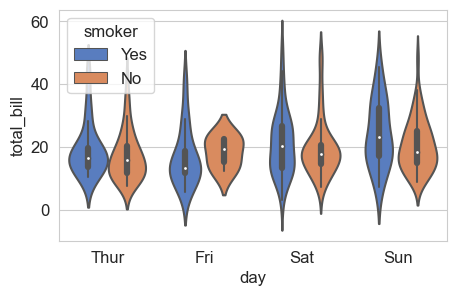

In [77]:
sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted")

- 스웜 플롯(swarm plot) : 바이올린 플롯과 같은 형태에 산점도로 데이터 분포를 나타냄
- 매개변수 hue로 두 개 이상의 범주형 데이터를 점이 겹치지 않게 정리 
- 영역별 데이터 양을 직관적으로 보여줌

<AxesSubplot: xlabel='day', ylabel='total_bill'>

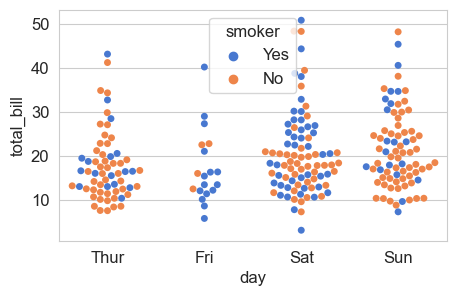

In [78]:
sns.swarmplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

#### 3.2 다양한 범주형 데이터를 나타내는 패싯그리드
- 패싯그리드(FacetGrid) : 그래프의 틀만 제공하여 적당한 그래프를 그려주는 클래스
- 그리드가 생성된 후 맵(map)을 사용하여 그래프 만듦
- 각 FacetGrid에 있는 개별 그래프 영역에 그래프를 집어넣는 구조
- 전체 데이터를 범주형 데이터의 다양한 관점에서 나눠서 볼 수 있음

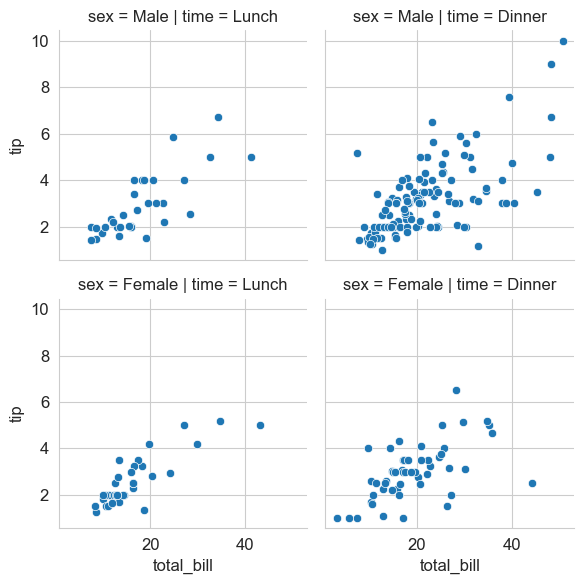

In [81]:
g = sns.FacetGrid(tips, col="time", row="sex")

g.map(sns.scatterplot, "total_bill", "tip")

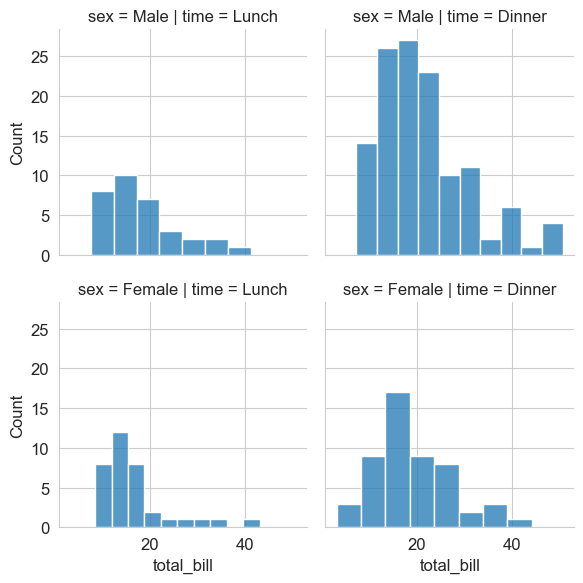

In [82]:
g = sns.FacetGrid(tips, col="time", row="sex")

g.map_dataframe(sns.histplot, x="total_bill")


------------------------

## <a name="05.3플롯리">05.3 플롯리</a>

### 1. 플롯리의 특징
- 플롯리(plotly) : 비즈니스 인텔리전스(Business Intelligence) 대시보드로 개발된 도구
- 맷플롯립이나 시본은 데이터 분석가들이 데이터의 형태나 분포를 살피기 위해 코드로 사용하는 도구
- 문법은 맷플롯립이나 시본과 유사
- 인터랙션 그래프를 지원
 - - 생성된 그래프에 마우스 커서를 올리면 데이터를 볼 수 있음 (인터랙션 그래프)

In [3]:
import plotly.express as px

df = px.data.iris()     # iris는 판다스 데이터프레임
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

### 좌표 그래프(coordinates plot) 
- 데이터 간 관계를 표현(시본은 제공하지 않지만 플롯리에서 제공하는 기능)

In [4]:
fig = px.parallel_coordinates(df, color="species_id", 
        labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                color_continuous_scale=  px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

-----------------

## <a name="예제:전세계행복지수">예제: 전세계행복지수 분석</a>

### 1. 파일의 데이터 읽어오기
- Ladder score : 행복지수

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

filename = './data/world-happiness-report-2021.csv'
happiness_data = pd.read_csv(filename)
happiness_data.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

### 2.데이터 살펴보기

In [16]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
happiness = happiness_data.iloc[:,[0,1,2,6,7,8,9,10,11]]
happiness.head(5)

Country name Regional indicator  Ladder score  Logged GDP per capita  \
0      Finland     Western Europe         7.842                 10.775   
1      Denmark     Western Europe         7.620                 10.933   
2  Switzerland     Western Europe         7.571                 11.117   
3      Iceland     Western Europe         7.554                 10.878   
4  Netherlands     Western Europe         7.464                 10.932   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.954                     72.0                         0.949   
1           0.954                     72.7                         0.946   
2           0.942                     74.4                         0.919   
3           0.983                     73.0                         0.955   
4           0.942                     72.4                         0.913   

   Generosity  Perceptions of corruption  
0      -0.098                      0.186  
1       0.030                      0.179  
2       0.025                      0.292  
3       0.160                      0.673  
4       0.175                      0.338

### 데이터 통계치 살펴보기
* 전체 나라 수, 행복지수의 최댓값, 행복지수 평균, 행복지수 최솟값

In [8]:
happiness.describe()   # 기술통계 정보

Ladder score  Logged GDP per capita  Social support  \
count    149.000000             149.000000      149.000000   
mean       5.532839               9.432208        0.814745   
std        1.073924               1.158601        0.114889   
min        2.523000               6.635000        0.463000   
25%        4.852000               8.541000        0.750000   
50%        5.534000               9.569000        0.832000   
75%        6.255000              10.421000        0.905000   
max        7.842000              11.647000        0.983000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               149.000000                    149.000000  149.000000   
mean                 64.992799                      0.791597   -0.015134   
std                   6.762043                      0.113332    0.150657   
min                  48.478000                      0.382000   -0.288000   
25%                  59.802000                      0.718000   -0.126000   
50%                  66.603000                      0.804000   -0.036000   
75%                  69.600000                      0.877000    0.079000   
max                  76.953000                      0.970000    0.542000   

       Perceptions of corruption  
count                 149.000000  
mean                    0.727450  
std                     0.179226  
min                     0.082000  
25%                     0.667000  
50%                     0.781000  
75%                     0.845000  
max                     0.939000

- **행복지수(Ladder score) 속성을 기준으로 내림차순 정렬: 특정 국가 조회** 

In [9]:
#'행복지수' 속성을 기준으로 내림차순 정렬 후, 국가명(Country name)이 'South Korea'인 행을 찾아 출력
happiness = happiness.sort_values('Ladder score', ascending=False)
happiness.loc[happiness['Country name']=='South Korea']

Country name Regional indicator  Ladder score  Logged GDP per capita  \
61  South Korea          East Asia         5.845                 10.651   

    Social support  Healthy life expectancy  Freedom to make life choices  \
61           0.799                     73.9                         0.672   

    Generosity  Perceptions of corruption  
61      -0.083                      0.727

- **가로막대형그래프 시각화** : 행복지수가 높거나, 낮은 국가 

<AxesSubplot: xlabel='Ladder score', ylabel='Country name'>

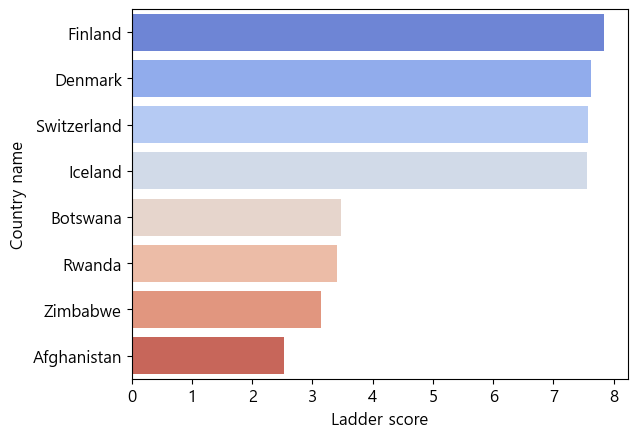

In [10]:
happinessFilter = happiness[(happiness.loc[:,'Ladder score']>=7.5) |\
                            (happiness.loc[:,'Ladder score']<=3.5)]
sns.barplot(x='Ladder score', y='Country name', data=happinessFilter, palette='coolwarm')

### [실습]
*  해보기
  * 다음 조건에 맞는 가로형 막대그래프를 출력해 봅시다.
  1. 1인당 국내총생산을 기준으로 내림차순으로 정렬한다.
  2. x축을 1인당 국내총생산(Logged GDP per capita)으로 변경한다.
  3. 1인당 국내총생산이 11.1 이상인 나라와 7.2 이하인 나라만 그래프로 표현한다.
  4. 색상팔레트를 'PiYG'로 설정한다.

In [11]:
happiness = happiness.sort_values('Logged GDP per capita', ascending=False)
happinessFilter = happiness[(happiness.loc[:,'Logged GDP per capita']>=11.1) |\
                            (happiness.loc[:,'Logged GDP per capita']<=7.2)]
sns.barplot(x='Logged GDP per capita', y='Country name', data=happinessFilter, palette='PiYG')

<AxesSubplot: xlabel='Logged GDP per capita', ylabel='Country name'>

-----------

### 탐색정보1.
#### 지역별 행복지수의 분포 시각화
* 시본의 boxplot()메소드
  * sns.boxplot(x='속성명', y='속성명', data=데이터프레임 객체)

In [12]:
sns.boxplot(x='Ladder score', y='Regional indicator', data=happiness, orient='h')

<AxesSubplot: xlabel='Ladder score', ylabel='Regional indicator'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'Southeast Asia'),
  Text(2, 0, 'Middle East and North Africa'),
  Text(3, 0, 'North America and ANZ'),
  Text(4, 0, 'East Asia'),
  Text(5, 0, 'Central and Eastern Europe'),
  Text(6, 0, 'Latin America and Caribbean'),
  Text(7, 0, 'Commonwealth of Independent States'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'South Asia')])

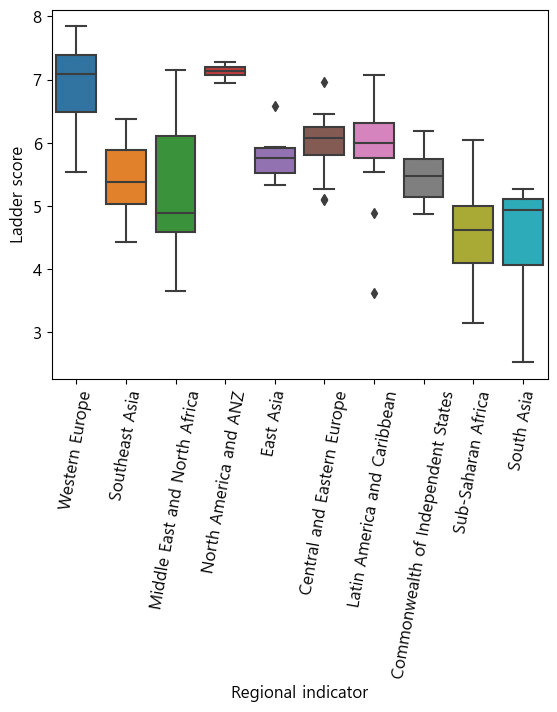

In [13]:
sns.boxplot(x='Regional indicator', y='Ladder score', data=happiness, orient='v')
plt.xticks(rotation=80)

In [24]:
df_data = happiness[['Regional indicator', 'Ladder score']]

df_data.groupby(['Regional indicator'])['Ladder score'].agg(**{'최소값':'min', '최대값':'max'}).reset_index()

# df_data.groupby(['Regional indicator'])['Ladder score'].quantile(.5)

Regional indicator    최소값    최대값
0          Central and Eastern Europe  5.101  6.965
1  Commonwealth of Independent States  4.875  6.179
2                           East Asia  5.339  6.584
3         Latin America and Caribbean  3.615  7.069
4        Middle East and North Africa  3.658  7.157
5               North America and ANZ  6.951  7.277
6                          South Asia  2.523  5.269
7                      Southeast Asia  4.426  6.377
8                  Sub-Saharan Africa  3.145  6.049
9                      Western Europe  5.536  7.842

### 상관계수 시각화
* px.imshow(데이터프레임객체.corr(), text_auto=True)

In [15]:
fig = px.imshow(happiness.corr(), text_auto=True)
fig.update_layout(title='상관관계 시각화', width=800, title_x=0.5)
fig.show()

C:\Users\yswoo\AppData\Local\Temp\ipykernel_21008\1769936046.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



-----------------------

### 탐색정보2.
* 전세계 행복지수를 한눈에 보기 위해 반응형 그래프 그리기
  * treemap()
  * sunburst()
  * choropleth()

### treemap 시각화
* treemap
  * 계층(트리구조)을 이루는 데이터 전체와 일부분 간의 관계를 파악하기 위한 시각화 기법
  * 범주간의 정확한 비교보다 큰 특징을 살펴볼 때 주로 사용

* `px.treemap(data_frame=데이터프레임객체, path=[부모열,자식열], values=열속성, color=열속성)`
  * path는 [부모,자식] 순서로 작성
  * values는 사각형 크기가 나타내는 속성
  * color는 색상으로 표현하는 속성

In [16]:
fig = px.treemap(data_frame=happiness, 
                 path=['Regional indicator','Country name'], 
                 values='Ladder score', 
                 color='Ladder score')
fig.show()

In [17]:
# 그래프 제목 넣기
fig = px.treemap(data_frame=happiness, 
                 path=[px.Constant('world'),'Regional indicator','Country name'], 
                 values='Ladder score', 
                 color='Ladder score')
fig.update_layout(title='나라별 행복 지수', title_x=0.5, width=900, height=900)
fig.show()

### sunburst 시각화
* px.sunburst(data_frame=데이터프레임객체, path=[부모열, 자식열], values=열속성, color=열속성)

In [18]:
fig = px.sunburst(data_frame=happiness, 
                  path=['Regional indicator', 'Country name'], 
                  values='Ladder score', 
                  color='Ladder score')
fig.update_layout(title='나라별 행복 지수', title_x=0.5, width=1200, height=900)
fig.show()

### choropleth
* px.choropleth(data_frame=데이터프레임객체, location='열이름', locationmode='country names', color='열이름')

In [29]:
px.choropleth(data_frame=happiness, 
              locations='Country name', 
              locationmode='country names', 
              color='Ladder score')

### 애니메이션 효과 사용하기

In [30]:
filename = './data/world-happiness-report-all.csv'
happiness_year_data = pd.read_csv(filename)
happiness_year_data.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

In [31]:
# 애니메이션 효과
fig = px.choropleth(data_frame=happiness_year_data.sort_values('year'),
                    locations='Country name', 
                    locationmode='country names', 
                    color='Life Ladder', 
                    animation_frame='year')
fig.update_layout(title='연도별 전 세계 행복지수')
fig.show()